Raw Output from API:
{
    "bounding_boxes": {
        "Blue Bird": [50, 50, 150, 150],
        "Traffic Light": [100, 0, 200, 300]
    },
    "z_order": ["Traffic Light", "Blue Bird"]
}      
Parsed Output:
{'bounding_boxes': {'Blue Bird': [50, 50, 150, 150], 'Traffic Light': [100, 0, 200, 300]}, 'z_order': ['Traffic Light', 'Blue Bird']}


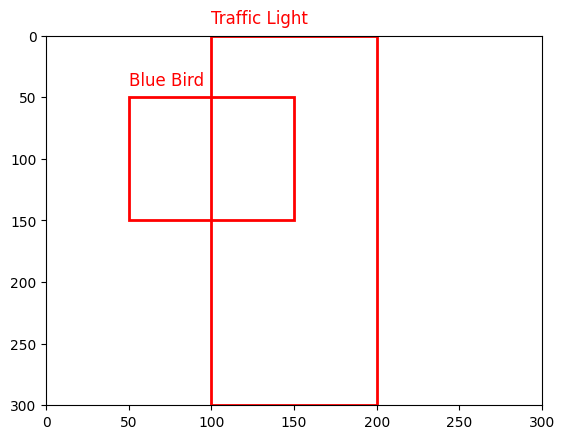

In [6]:
import openai
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def generate_bounding_boxes_and_order(objects, scene_description):
    # Create the prompt
    prompt = f"""
    Given the following objects: {objects}
    And the original scene described as: "{scene_description}"
    Provide bounding box coordinates and z-order for each object, ensuring that their placement respects the semantic relationship described.
    The output should be in the following JSON format:
    {{
        "bounding_boxes": {{
            "Object Name 1": [x_min, y_min, x_max, y_max],
            "Object Name 2": [x_min, y_min, x_max, y_max]
        }},
        "z_order": ["Object Name 1", "Object Name 2"]
    }}
    """

    # Call the OpenAI API with the prompt
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ]
    )

    # Extract the output text
    return response['choices'][0]['message']['content']

# Example objects and scene description
objects = ["Blue Bird", "Traffic Light"]
scene_description = "A blue bird on a traffic light that has a red signal."

# Generate bounding boxes and z-order
output = generate_bounding_boxes_and_order(objects, scene_description)

# Display the raw output to check its format
print("Raw Output from API:")
print(output)

# Attempt to parse the output
try:
    output_dict = json.loads(output)
    print("Parsed Output:")
    print(output_dict)

    # Plotting the bounding boxes
    fig, ax = plt.subplots()

    # Assuming a basic scene size, e.g., 300x300 pixels
    scene_width, scene_height = 300, 300
    ax.set_xlim(0, scene_width)
    ax.set_ylim(0, scene_height)
    ax.invert_yaxis()  # Invert y-axis to match typical image coordinates

    # Draw each bounding box
    for obj in output_dict['bounding_boxes']:
        bbox = output_dict['bounding_boxes'][obj]
        rect = patches.Rectangle(
            (bbox[0], bbox[1]),  # (x_min, y_min)
            bbox[2] - bbox[0],  # width
            bbox[3] - bbox[1],  # height
            linewidth=2, edgecolor='r', facecolor='none'
        )
        ax.add_patch(rect)
        plt.text(bbox[0], bbox[1] - 10, obj, color='red', fontsize=12)

    plt.show()

except json.JSONDecodeError as e:
    print("Error decoding JSON:", str(e))
